In [1]:
import numpy as np
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
def bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def create_tf(num, train_images, train_labels):

    train_filename = '/home/antreas/Desktop/tf_records_file/third_dataset/tf_records'+str(num+114)+'.tfrecords' ###Where to save TFrecords files
    writer = tf.python_io.TFRecordWriter(train_filename)

    for i in range(len(train_images)):
        img=train_images[i]
        labels=train_labels[i]

        feature = {'image': bytes_feature(img.tostring()),
                  'labels': bytes_feature(labels.tostring())
                  }
        example = tf.train.Example(features=tf.train.Features(feature=feature))
        writer.write(example.SerializeToString())

    writer.close()

In [3]:
train_labels=np.load('/home/antreas/Desktop/arrays3/half_gr3_2.npy')###Ground Truth
train_images=np.load('/home/antreas/Desktop/arrays3/half_im3_2.npy')##### Images

In [4]:
num_per_tf=1000
i=1
while i<=((len(train_images)/num_per_tf)):
    end=i*num_per_tf
    start=end-num_per_tf
    images=train_images[start:end]
    labels=train_labels[start:end]
    create_tf(i, images, labels)
    i+=1
if end !=(len(train_images)):
    images=train_images[end: len(train_images)]
    labels=train_labels[end: len(train_labels)]
    create_tf(i+1, images, labels)
    print (i+1)

39


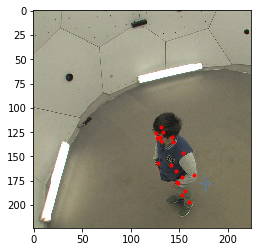

In [3]:
plt.imshow(train_images[45])
plt.plot(train_labels[45][0][:], train_labels[45][1][:] , '.', color='red')
plt.draw()

(29189, 2, 1, 19)